In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
cab =pd.read_csv('Datasets/Cab_Data.csv')
city = pd.read_csv('Datasets/City.csv')
customer = pd.read_csv('Datasets/Customer_ID.csv')
transaction = pd.read_csv('Datasets/Transaction_ID.csv')

In [ ]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], format='%m/%d/%Y')

In [ ]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [ ]:
cab['Date of Travel']

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [ ]:
# Renaming the columns
for col in cab.columns:
    if " " in col:
        cab = cab.rename(columns={col:col.replace(" ", "_")})
for col in city.columns:
    if " " in col:
        city = city.rename(columns={col:col.replace(" ", "_")})
for col in customer.columns:
    if " " in col:
        customer = customer.rename(columns={col:col.replace(" ", "_")})
for col in transaction.columns:
    if " " in col:
        transaction = transaction.rename(columns={col:col.replace(" ", "_")})

In [ ]:
transaction.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
for col in customer.columns:
    if "_" in col:
        customer = customer.rename(columns={col:col.replace("_", " ")})

In [ ]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
customer = customer.rename(columns={"Customer ID":"Customer_ID"})

In [ ]:
customer.head()

,Customer_ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [ ]:
cab.groupby("Date_of_Travel").Transaction_ID.count().head().sort_values(ascending=False)

Date_of_Travel
2016-01-02    181
2016-01-03    178
2016-01-06    109
2016-01-05     47
2016-01-04     25
Name: Transaction_ID, dtype: int64

In [ ]:
months=[]
year=[]
day = []
day_of_the_week =[]

for i in range(len(cab["Date_of_Travel"])):
    months.append(cab["Date_of_Travel"][i].month)
    year.append(cab["Date_of_Travel"][i].year)
    day.append(cab["Date_of_Travel"][i].day)
    day_of_the_week.append(cab["Date_of_Travel"][i].weekday())
    #dy={0:"Mon",1:"Tue",2:"Wed" ,3:"Thur",4:"Fri",5:"Sat",6:"Sun"}
    #if day_of_the_week[i] in dy.keys():
    #    day_of_the_week[i] = dy[day_of_the_week[i]]
    
cab["Month"]= months
cab["Year"]=year
cab["Day"] = day
cab["Day_of_the_Week"] =day_of_the_week

In [ ]:
cab.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day,Day_of_the_Week
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,8,4
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,6,2
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,2,5
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,7,3
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,3,6
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024,1,2016,7,3
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200,1,2016,3,6
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890,1,2016,7,3
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880,1,2016,12,1
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256,1,2016,6,2


# Days Analysis

Text(0.5, 1.0, 'Day Of the week Analysis')

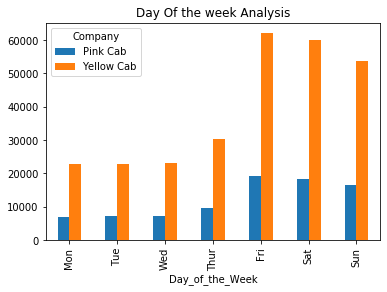

In [ ]:
plotter = cab.groupby(["Day_of_the_Week","Company"]).Transaction_ID.count()
plotter.unstack().plot(kind="bar")
plt.xticks(range(0,7),["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.title("Day Of the week Analysis")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 30 Text xticklabel objects>)

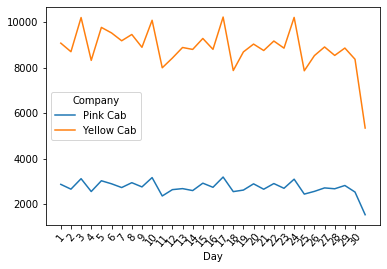

In [ ]:
day_plot = cab.groupby(["Day","Company"]).Transaction_ID.count()
day_plot.unstack().plot(kind="line")
plt.xticks(range(1,31))
plt.xticks(rotation=50)

# Monthly Analysis

In [ ]:
plot1=cab.groupby("Month").Transaction_ID.count()

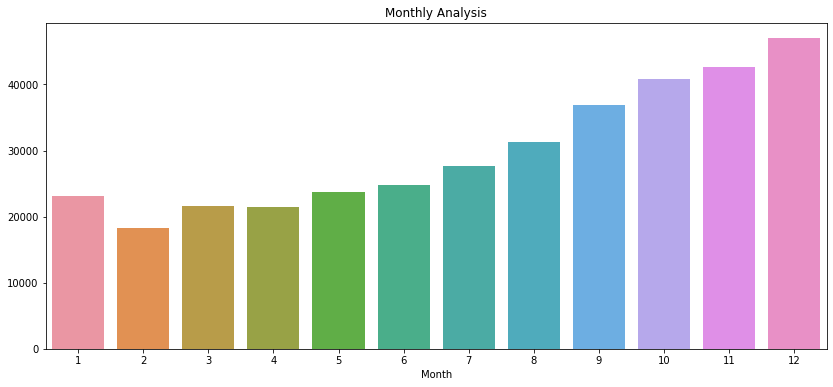

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title("Monthly Analysis")
plt.show()



In [ ]:
cab.groupby("Month").Cost_of_Trip.mean()

Month
1     288.648335
2     288.094329
3     289.386573
4     288.530805
5     286.403600
6     286.331530
7     287.182593
8     285.468802
9     283.784453
10    284.323765
11    285.094665
12    285.915103
Name: Cost_of_Trip, dtype: float64

# Yearly Analysis

In [ ]:
plot2 =cab.groupby(["Year","Company"]).Transaction_ID.count()

In [ ]:
x=plot2.unstack()
x

Company,Pink Cab,Yellow Cab
Year,,
2016,25080,82239
2017,30321,98189
2018,29310,94253


Text(0.5, 1.0, 'Yearly Customer distribution')

<Figure size 1440x720 with 0 Axes>

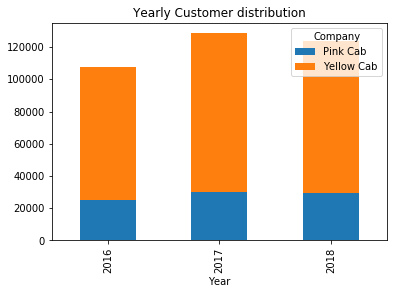

In [ ]:
plt.figure(figsize=(20,10))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Yearly Customer distribution")



No handles with labels found to put in legend.


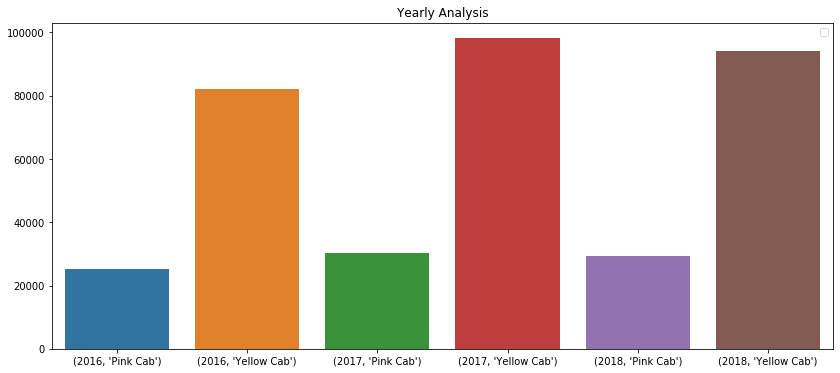

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot2.index,y=plot2.values)
plt.title("Yearly Analysis")
plt.legend()
plt.show()

# Company Analysis

In [ ]:
plot3=cab.groupby("Company").Transaction_ID.count()

Text(0, 0.5, 'Number Of Customers')

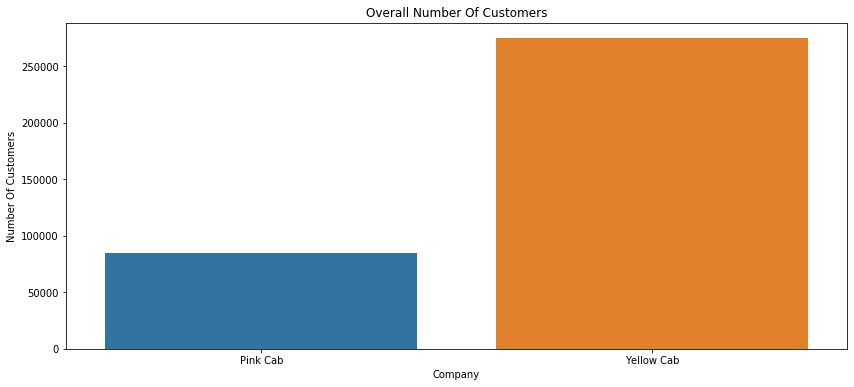

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [ ]:
plot4= cab[cab.Company=="Pink Cab"].groupby("Month").Transaction_ID.count()

In [ ]:
plot4

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

In [ ]:
plot5= cab[cab.Company=="Yellow Cab"].groupby("Month").Transaction_ID.count()

In [ ]:
plot5

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

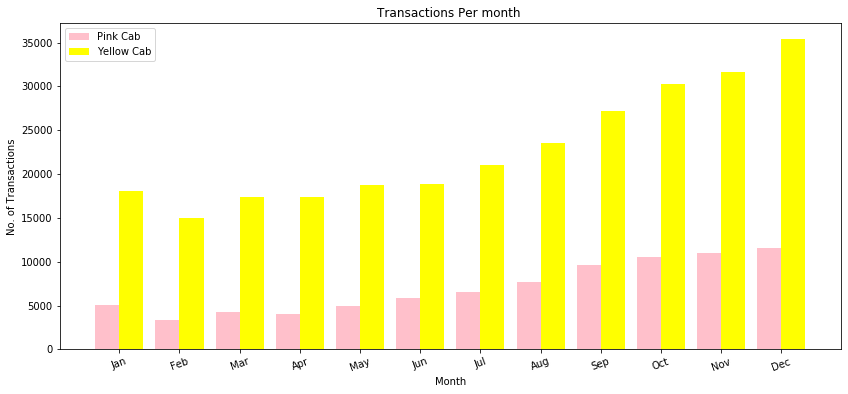

In [ ]:
plt.figure(figsize=(14,6))
ax =plt.subplot(111)
ax.bar(plot4.index-0.2,plot4.values,width=0.4,color="Pink",align="center",label="Pink Cab")
ax.bar(plot5.index+0.2,plot5.values,width=0.4,color="Yellow",align="center",label="Yellow Cab")
plt.title("Transactions Per month ")
plt.ylabel("No. of Transactions")
#locs, labels = plt.xticks()
plt.xticks(np.arange(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=20)
plt.xlabel("Month")
plt.legend()

In [ ]:
cab[cab.Company=="Pink Cab"].groupby("Year").Price_Charged.mean()

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64

In [ ]:
cab[cab.Company=="Yellow Cab"].groupby("Year").Price_Charged.mean()

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [ ]:
cab[cab.Company=="Pink Cab"].groupby("Year").Cost_of_Trip.mean()

Year
2016    247.008294
2017    248.836603
2018    248.412841
Name: Cost_of_Trip, dtype: float64

In [ ]:
cab[cab.Company=="Yellow Cab"].groupby("Year").Cost_of_Trip.mean()

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

# Merging of Data

In [ ]:
left= cab.set_index(["Transaction_ID"])
right = transaction.set_index(["Transaction_ID"])
data = left.join(right)
data

,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,8,29290,Card
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,6,27703,Card
10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,2,28712,Cash
10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,7,28020,Cash
10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,3,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...
10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,8,52392,Cash
10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,4,53286,Cash
10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,5,52265,Cash


In [ ]:
left = data.set_index([data.index,"Customer_ID"])
right = customer.set_index(["Customer_ID"])
data = left.join(right)
data

,,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,,,
10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,8,Card,Male,28,10813
10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,6,Card,Male,27,9237
10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,2,Cash,Male,53,11242
10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,7,Cash,Male,23,23327
10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,3,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,8,Cash,Male,24,15651
10440104,53286,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,4,Cash,Male,32,6528
10440105,52265,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,5,Cash,Male,56,7966


In [ ]:
data=data.reset_index()

In [ ]:
data = data.rename(columns={"Income (USD/Month)":"Income"})

In [ ]:
data

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day,Payment_Mode,Gender,Age,Income
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,8,Card,Male,28,10813
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,6,Card,Male,27,9237
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,2,Cash,Male,53,11242
3,10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,7,Cash,Male,23,23327
4,10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,3,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,8,Cash,Male,24,15651
359388,10440104,53286,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,4,Cash,Male,32,6528
359389,10440105,52265,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,5,Cash,Male,56,7966
359390,10440106,52175,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018,5,Card,Male,32,6423


In [ ]:
city_data = data.groupby("City").Transaction_ID.count()
city_data

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

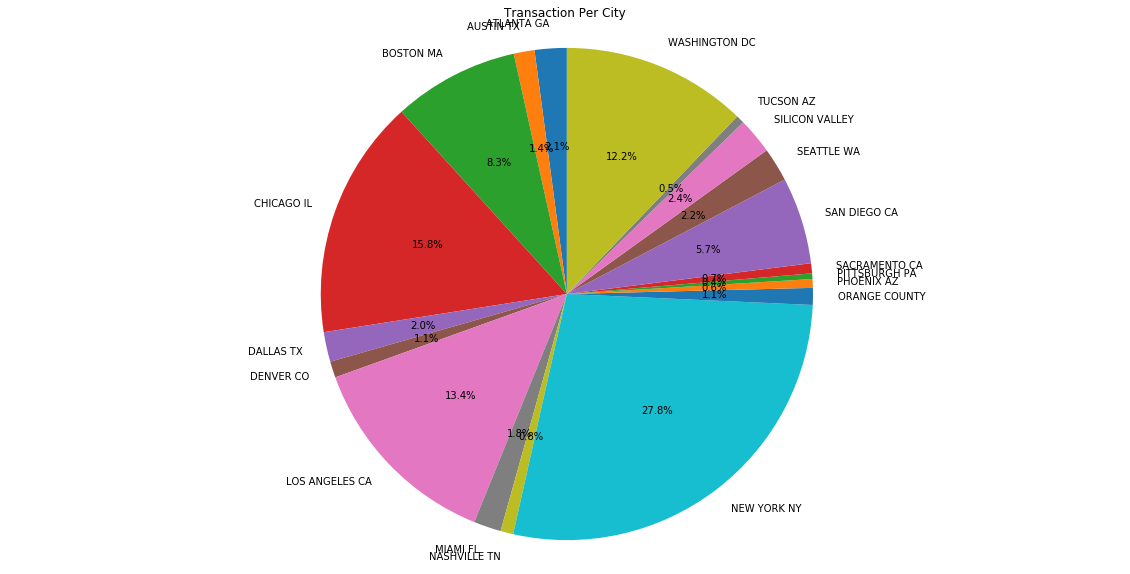

In [ ]:
labs = city_data.index
vals  = city_data.values
figp , ax =plt.subplots(figsize=(20,10))
ax.pie(vals,labels=labs,autopct="%1.1f%%",startangle=90)
ax.axis('equal')
plt.title("Transaction Per City")
plt.show()

# Payment Models

In [ ]:
data.groupby(['Company','Payment_Mode']).Transaction_ID.count()

Company     Payment_Mode
Pink Cab    Card             50719
            Cash             33992
Yellow Cab  Card            164785
            Cash            109896
Name: Transaction_ID, dtype: int64

In [ ]:
data.groupby(['Company','Payment_Mode']).Price_Charged.mean()

Company     Payment_Mode
Pink Cab    Card            311.197319
            Cash            310.209299
Yellow Cab  Card            457.924979
            Cash            458.567368
Name: Price_Charged, dtype: float64

# Gender Share

In [ ]:
data.groupby("Gender").Price_Charged.agg(["mean"])
#Females are actually charged less

,mean
Gender,
Female,419.419578
Male,426.442469


In [ ]:
data.groupby(["Gender","Company"]).Price_Charged.agg(["mean"])
#Yellow cab charges way more on men

mean
Gender Company               
Female Pink Cab    310.624823
       Yellow Cab  454.571538
Male   Pink Cab    310.940547
       Yellow Cab  460.821326

Text(0, 0.5, 'Number Of Customers')

<Figure size 1440x720 with 0 Axes>

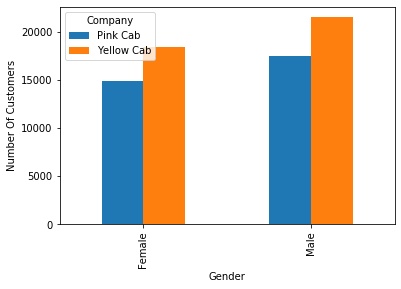

In [ ]:
gen=data.groupby(["Gender","Company"]).Customer_ID.nunique()
plt.figure(figsize=(20,10))
gen.unstack().plot(kind="bar")
plt.ylabel("Number Of Customers")

Text(0.5, 1.0, 'Number Of Customers Per City Analysis')

<Figure size 432x288 with 0 Axes>

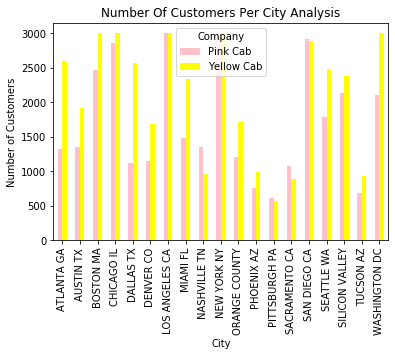

In [ ]:
city_plot = data.groupby(["City","Company"]).Customer_ID.nunique()
plt.figure()
city_plot.unstack().plot(kind="bar", color=["Pink","Yellow"])
plt.ylabel("Number of Customers")
plt.title("Number Of Customers Per City Analysis")


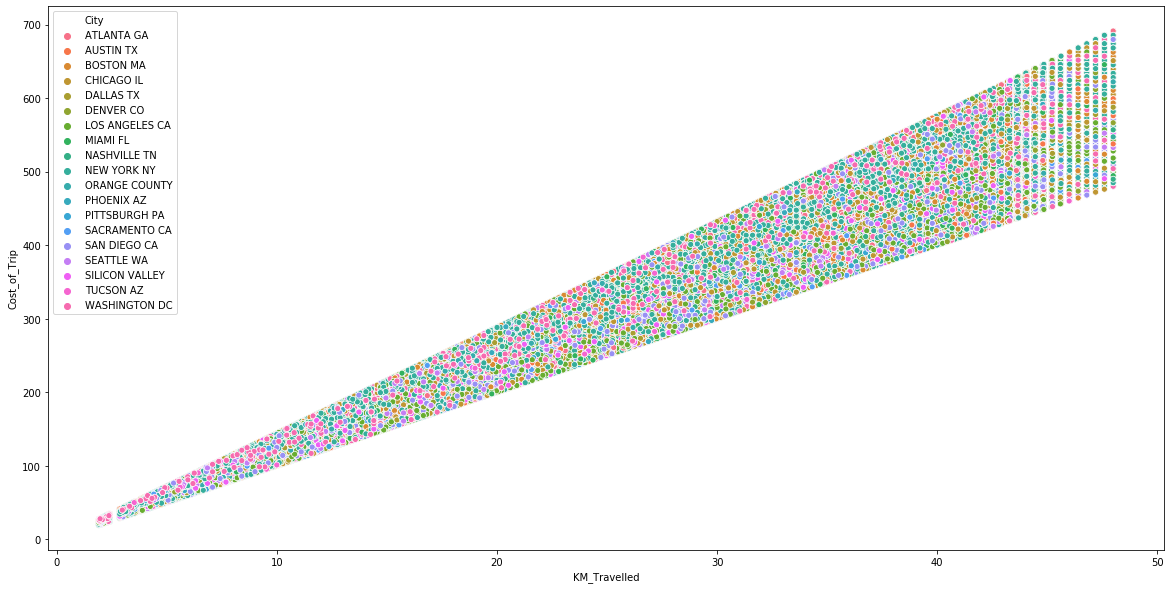

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x="KM_Travelled",y="Cost_of_Trip",hue="City")
plt.show()
#Cost of travel is directly proposional to kilometers travelled and does not depend on the city.

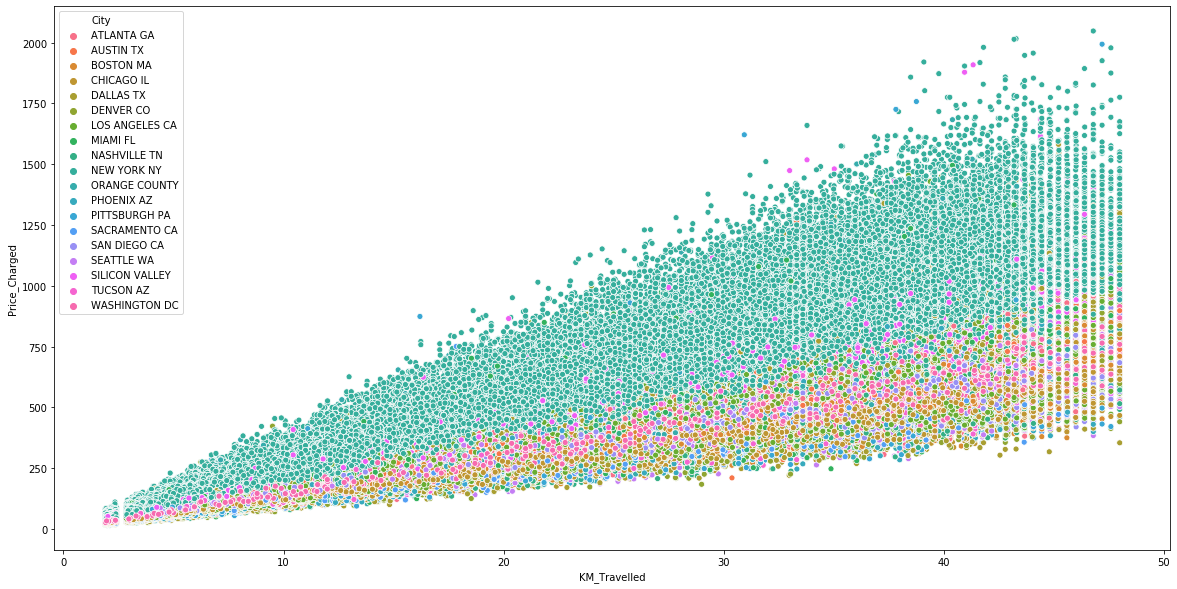

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x="KM_Travelled",y="Price_Charged",hue="City")
plt.show()
#Price charged for rides in New York are actually more than others.

# Age Analysis

In [ ]:
plot_age = data.groupby(["Age"]).Customer_ID.nunique()
plot_age

Age
18    1450
19    1475
20    1535
21    1476
22    1499
23    1515
24    1442
25    1504
26    1485
27    1489
28    1500
29    1408
30    1457
31    1441
32    1492
33    1407
34    1548
35    1404
36    1433
37    1475
38    1417
39    1524
40    1456
41     491
42     493
43     498
44     458
45     524
46     508
47     503
48     502
49     502
50     509
51     496
52     497
53     479
54     479
55     468
56     490
57     462
58     502
59     517
60     473
61     550
62     462
63     481
64     505
65     467
Name: Customer_ID, dtype: int64

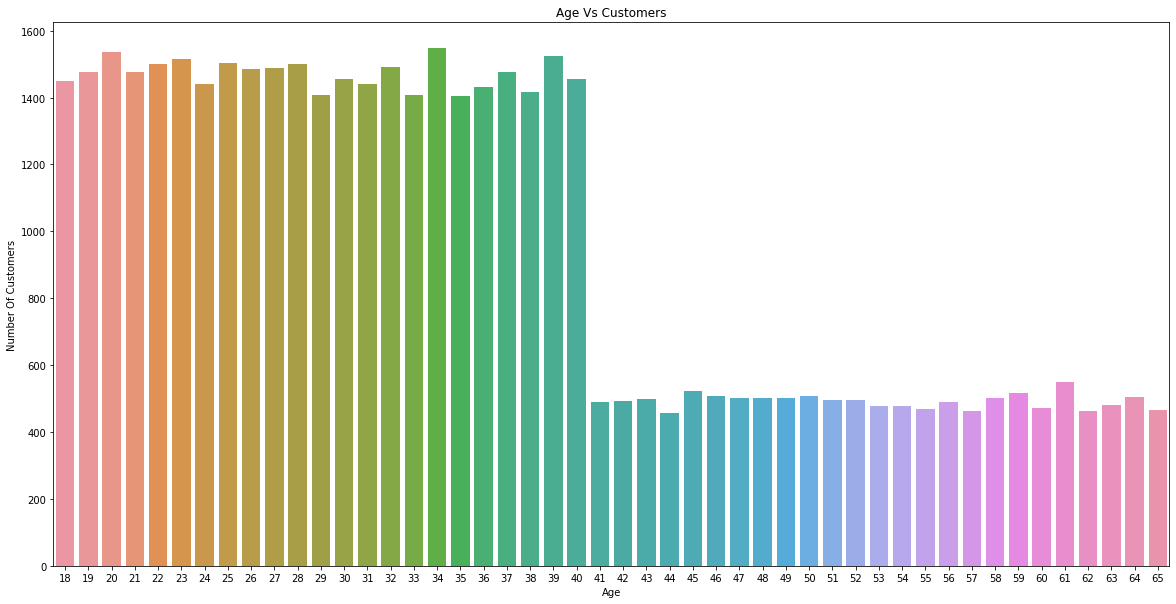

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=plot_age.index,y=plot_age.values)
plt.title("Age Vs Customers")
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.show()

In [ ]:
plot_age2= data.groupby(["Age"]).Transaction_ID.count()
plot_age2

Age
18    10846
19    11591
20    12229
21    11431
22    11796
23    12327
24    11151
25    11973
26    11655
27    12030
28    11163
29    10675
30    11165
31    10930
32    11959
33    11457
34    11825
35    10555
36    11054
37    11086
38    10906
39    11798
40    11536
41     3852
42     3970
43     3823
44     3725
45     4248
46     3918
47     4087
48     3700
49     4158
50     4089
51     3931
52     3784
53     3641
54     3810
55     3442
56     3742
57     3473
58     4107
59     4068
60     3775
61     4361
62     3530
63     3733
64     3908
65     3379
Name: Transaction_ID, dtype: int64

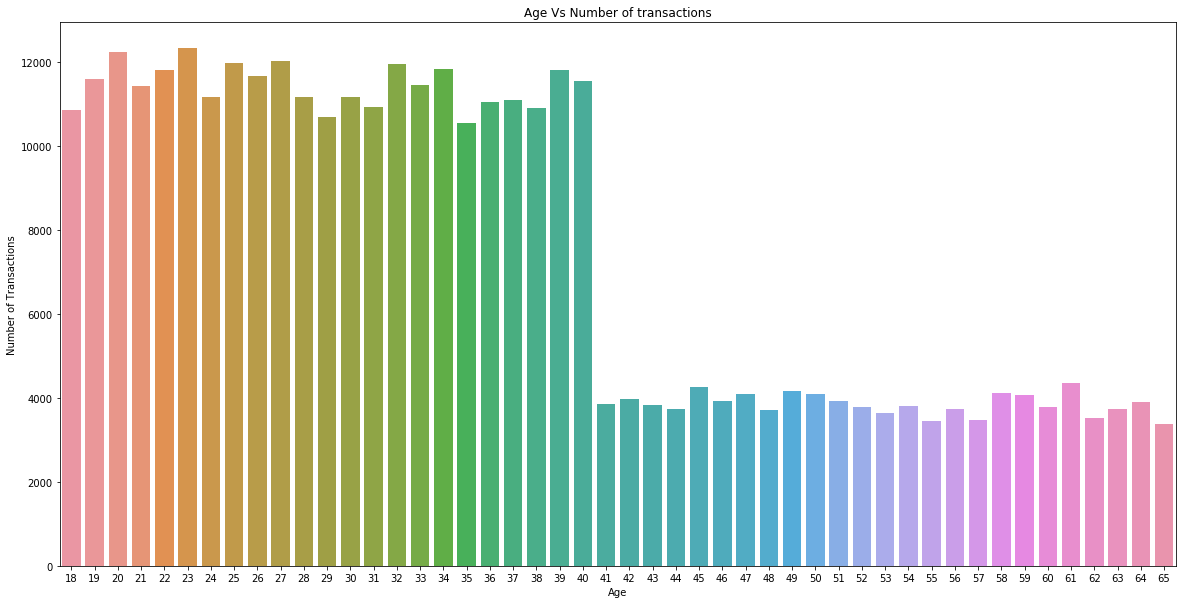

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=plot_age2.index,y=plot_age2.values)
plt.title("Age Vs Number of transactions")
plt.xlabel("Age")
plt.ylabel("Number of Transactions")
plt.show()

In [ ]:
data.groupby(["Company"]).Age.agg(["mean"])
# The average age for customers for both cabs is 35

,mean
Company,
Pink Cab,35.322414
Yellow Cab,35.341112


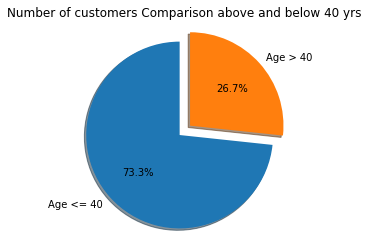

In [ ]:
labels = ["Age <= 40","Age > 40"]
ages = [plot_age[plot_age.index <= 40].values.sum(),plot_age[plot_age.index > 40].values.sum()]
explode = [0.15,0]
fig,ax = plt.subplots()
ax.pie(ages , explode=explode  ,autopct="%1.1f%%" , labels=labels , shadow=True , startangle=90)
ax.axis("equal")
plt.title("Number of customers Comparison above and below 40 yrs")
plt.show()

In [ ]:
company_age = data.groupby(["Company","Age"]).Customer_ID.agg(["nunique"])
company_age = company_age.reset_index()
company_age

,Company,Age,nunique
0,Pink Cab,18,1028
1,Pink Cab,19,1062
2,Pink Cab,20,1072
3,Pink Cab,21,1016
4,Pink Cab,22,1041
...,...,...,...
91,Yellow Cab,61,477
92,Yellow Cab,62,397
93,Yellow Cab,63,411
94,Yellow Cab,64,425


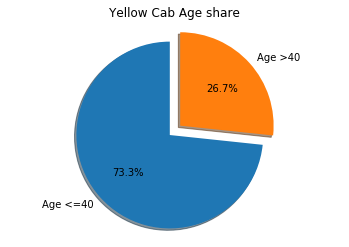

In [ ]:
plt2 =[company_age[(company_age.Company=="Yellow Cab") & (company_age.Age <=40)]['nunique'].sum() 
       , company_age[(company_age.Company=="Yellow Cab") & (company_age.Age > 40)]['nunique'].sum()]
labels2=["Age <=40","Age >40"]
explode2 = [0.15,0]
fig2, ax2 = plt.subplots()
ax2.pie(plt2 , labels=labels2 , explode=explode2 , autopct = "%1.1f%%" , shadow=True , startangle=90)
plt.axis("equal")
plt.title("Yellow Cab Age share")
plt.show()

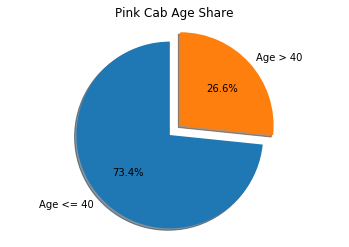

In [ ]:
plt3 = [company_age[(company_age.Age <=40) & (company_age.Company == "Pink Cab")]['nunique'].sum() , 
        company_age[(company_age.Age >40) & (company_age.Company =="Pink Cab")]["nunique"].sum()]
labels3 = ["Age <= 40","Age > 40"]
explode3 =[0.15,0]
fig , ax = plt.subplots()
ax.pie(plt3 , labels=labels , explode=explode3 , shadow=True , autopct="%1.1f%%" , startangle=90)
plt.axis("equal")
plt.title("Pink Cab Age Share")
plt.show()
    

In [ ]:
data[data.Age <= 40]["KM_Travelled"].mean()

22.562932149670704

In [ ]:
data[data.Age > 40]["KM_Travelled"].mean()

22.579069337378076

In [ ]:
data[data.Age <= 40]["Price_Charged"].mean()

423.38327387150764

In [ ]:
data[data.Age > 40]["Price_Charged"].mean()

423.60744072974467

Km  travelled and price charged is same accross all ages

# Gender Analysis

In [ ]:
#Number of transaction gender analysis
gender = data.groupby(["Company","Gender"]).Transaction_ID.agg(["count"])
gender

count
Company    Gender        
Pink Cab   Female   37480
           Male     47231
Yellow Cab Female  116000
           Male    158681

In [ ]:
#Number of customers gender analysis
gender2 = data.groupby(["Company","Gender"]).Customer_ID.agg(["nunique"])
gender2

nunique
Company    Gender         
Pink Cab   Female    14819
           Male      17511
Yellow Cab Female    18394
           Male      21502

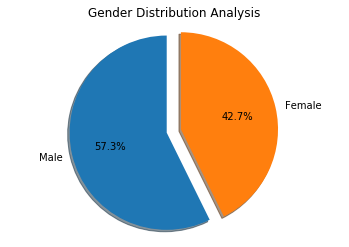

In [ ]:
label4 = ["Male", "Female"]
pct4 =[data[data.Gender== "Male"]["Gender"].count() , data[data.Gender== "Female"]["Gender"].count()]
fig4 , ax4 = plt.subplots()
ax4.pie(pct4 , labels=label4 , autopct="%1.1f%%" , explode=(0.15,0) , shadow=True , startangle =90)
plt.axis("equal")
plt.title("Gender Distribution Analysis")
plt.show()

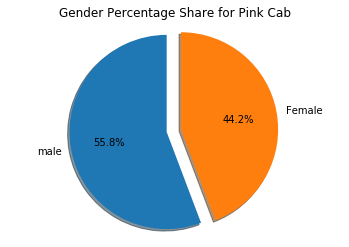

In [ ]:
labels6 = ["male", "Female"]
pct5 = [data[(data.Gender == "Male") & (data.Company=="Pink Cab")]["Gender"].count() , 
       data[(data.Gender == "Female") & (data.Company=="Pink Cab")]["Gender"].count()]
fig , ax = plt.subplots()
ax.pie(pct5 , explode=(0.15,0) , autopct="%1.1f%%" ,labels=labels6 , shadow=True , startangle=90)
plt.axis("equal")
plt.title("Gender Percentage Share for Pink Cab")
plt.show()

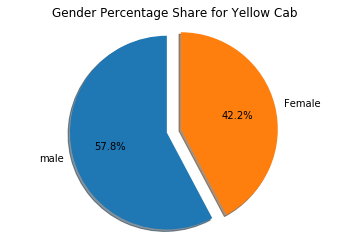

In [ ]:
labels6 = ["male", "Female"]
pct5 = [data[(data.Gender == "Male") & (data.Company=="Yellow Cab")]["Gender"].count() , 
       data[(data.Gender == "Female") & (data.Company=="Yellow Cab")]["Gender"].count()]
fig , ax = plt.subplots()
ax.pie(pct5 , explode=(0.15,0) , autopct="%1.1f%%" ,labels=labels6 , shadow=True , startangle=90)
plt.axis("equal")
plt.title("Gender Percentage Share for Yellow Cab")
plt.show()

In [ ]:
data.groupby(['Company','Year','Gender']).Transaction_ID.count()

Company     Year  Gender
Pink Cab    2016  Female    10873
                  Male      14207
            2017  Female    13475
                  Male      16846
            2018  Female    13132
                  Male      16178
Yellow Cab  2016  Female    33861
                  Male      48378
            2017  Female    41785
                  Male      56404
            2018  Female    40354
                  Male      53899
Name: Transaction_ID, dtype: int64

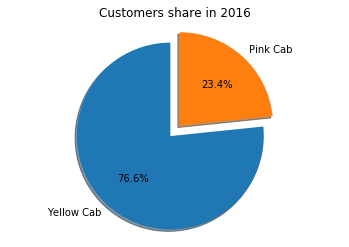

In [ ]:
labels7 = 'Yellow Cab','Pink Cab' 
pct7 = [data[(data.Year==2016) & (data.Company=='Yellow Cab')]['Customer_ID'].count(),data[(data.Year==2016) & (data.Company=='Pink Cab')]['Customer_ID'].count() ]
fig7, ax7 = plt.subplots()
explode=(0.15,0)
ax7.pie(pct7 ,explode = explode, labels=labels7, autopct='%1.1f%%',shadow=True, startangle=90)
ax7.axis('equal')

plt.title('Customers share in 2016')
plt.show()

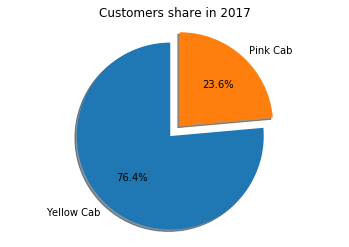

In [ ]:
labels8 = 'Yellow Cab','Pink Cab' 
pct8 = [data[(data.Year==2017) & (data.Company=='Yellow Cab')]['Customer_ID'].count(),data[(data.Year==2017) & (data.Company=='Pink Cab')]['Customer_ID'].count() ]
fig8, ax8 = plt.subplots()
ax8.pie(pct8 ,explode = explode, labels=labels8, autopct='%1.1f%%',shadow=True, startangle=90)
ax8.axis('equal')

plt.title('Customers share in 2017')
plt.show()

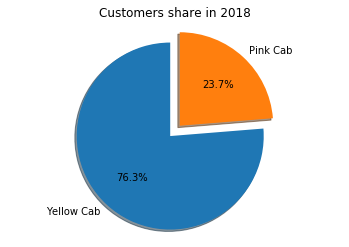

In [ ]:
labels9 = 'Yellow Cab','Pink Cab' 
pct9 = [data[(data.Year==2018) & (data.Company=='Yellow Cab')]['Customer_ID'].count(),data[(data.Year==2018) & (data.Company=='Pink Cab')]['Customer_ID'].count() ]
fig9, ax9 = plt.subplots()
ax9.pie(pct9 ,explode = explode, labels=labels9, autopct='%1.1f%%',shadow=True, startangle=90)
ax9.axis('equal')

plt.title('Customers share in 2018')
plt.show()

# Percentage Increase Per Year

In [ ]:
(pct9[0]-pct8[0])*100/pct8[0]
#Decrease in the number of customers from 2017 to 2018 for Yellow Cab

-4.008595667539134

In [ ]:
(pct9[1]-pct8[1])*100/pct8[1]
#Decrease in the number of customers from 2017 to 2018 for Pink Cab

-3.3343227466112597

In [ ]:
(pct8[0]-pct7[0])*100/pct7[0]
#Increse in the number of customers from 2016 to 2017 for Yellow Cab

19.394691083305975

In [ ]:
(pct8[1]-pct7[1])*100/pct7[1]
#Increse in the number of customers from 2016 to 2017 for Pink Cab

20.89712918660287

# Kilometers Travelled Analysis

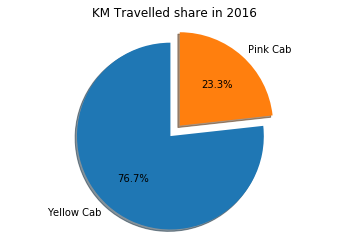

In [ ]:
labels10 = 'Yellow Cab','Pink Cab' 
pct10 = [data[(data.Year==2016) & (data.Company=='Yellow Cab')]['KM_Travelled'].sum(),data[(data.Year==2016) & (data.Company=='Pink Cab')]['KM_Travelled'].sum() ]
fig10, ax10 = plt.subplots()
ax10.pie(pct10 ,explode = explode, labels=labels10, autopct='%1.1f%%',shadow=True, startangle=90)
ax10.axis('equal')

plt.title('KM Travelled share in 2016')
plt.show()

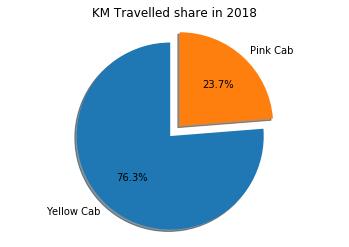

In [ ]:
labels11 = 'Yellow Cab','Pink Cab' 
pct11 = [data[(data.Year==2018) & (data.Company=='Yellow Cab')]['KM_Travelled'].sum(),data[(data.Year==2018) & (data.Company=='Pink Cab')]['KM_Travelled'].sum() ]
fig11, ax11 = plt.subplots()
ax11.pie(pct11 ,explode = explode, labels=labels11, autopct='%1.1f%%',shadow=True, startangle=90)
ax11.axis('equal')

plt.title('KM Travelled share in 2018')
plt.show()

# Margin Analysis

In [ ]:
data["Margins"] = (data["Price_Charged"]-data["Cost_of_Trip"])

Text(0.5, 1.0, 'Margin distribution across the three Years')

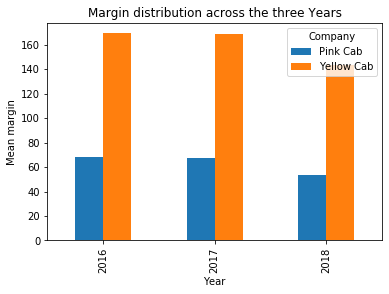

In [ ]:
w=data.groupby(["Year","Company"]).Margins.mean()
w.unstack().plot(kind="bar")
plt.ylabel("Mean margin")
plt.title("Margin distribution across the three Years")

In [ ]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Date_of_Travel', 'Company', 'City',
       'KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Month', 'Year', 'Day',
       'Payment_Mode', 'Gender', 'Age', 'Income', 'Margins'],
      dtype='object')

In [ ]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Margins
KM_Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056
Month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352
Year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000


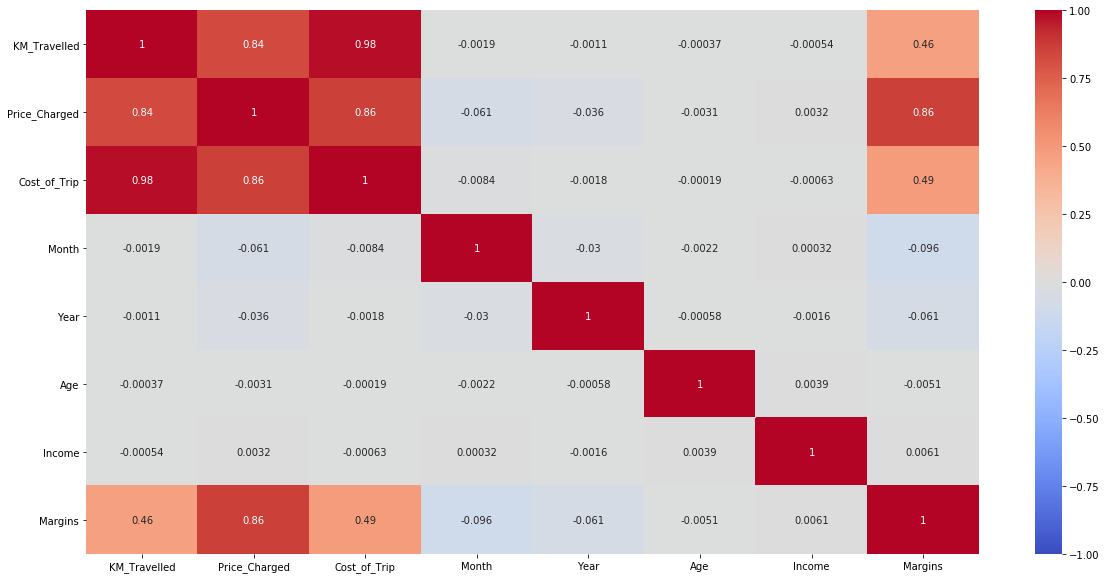

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot = True , vmin=-1 , vmax=1 , cmap ="coolwarm")

In [ ]:
data.groupby(["Gender","Company"]).Margins.mean()
# Males bring better margins for both companies

Gender  Company   
Female  Pink Cab       62.180701
        Yellow Cab    156.305325
Male    Pink Cab       63.026310
        Yellow Cab    163.150948
Name: Margins, dtype: float64

# Other

In [ ]:
data.groupby("Payment_Mode").Payment_Mode.count()

Payment_Mode
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

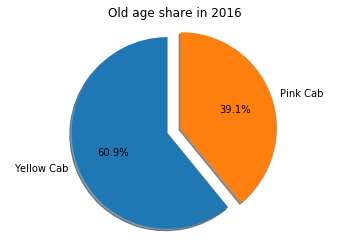

In [ ]:
labels_d = ["Yellow Cab", "Pink Cab"]
pct = [data[(data.Year == 2016) & (data.Company == "Yellow Cab") & (data.Age >=45)]["Customer_ID"].nunique() , 
 data[(data.Year == 2016) & (data.Company == "Pink Cab") & (data.Age >=45)]["Customer_ID"].nunique() ]
fig , ax = plt.subplots()
ax.pie(pct , labels=labels_d , explode=(0.15,0) , autopct = "%1.1f%%" , startangle=90, shadow= True)
plt.axis("equal")
plt.title("Old age share in 2016")
plt.show()

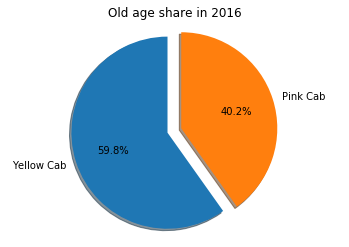

In [ ]:
labels_d = ["Yellow Cab", "Pink Cab"]
pct = [data[(data.Year == 2017) & (data.Company == "Yellow Cab") & (data.Age >=45)]["Customer_ID"].nunique() , 
 data[(data.Year == 2017) & (data.Company == "Pink Cab") & (data.Age >=45)]["Customer_ID"].nunique() ]
fig , ax = plt.subplots()
ax.pie(pct , labels=labels_d , explode=(0.15,0) , autopct = "%1.1f%%" , startangle=90, shadow= True)
plt.axis("equal")
plt.title("Old age share in 2016")
plt.show()

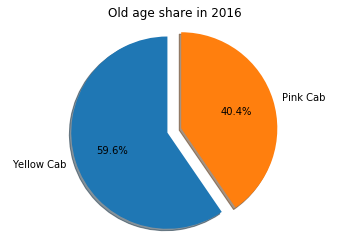

In [ ]:
labels_d = ["Yellow Cab", "Pink Cab"]
pct = [data[(data.Year == 2018) & (data.Company == "Yellow Cab") & (data.Age >=45)]["Customer_ID"].nunique() , 
 data[(data.Year == 2018) & (data.Company == "Pink Cab") & (data.Age >=45)]["Customer_ID"].nunique() ]
fig , ax = plt.subplots()
ax.pie(pct , labels=labels_d , explode=(0.15,0) , autopct = "%1.1f%%" , startangle=90, shadow= True)
plt.axis("equal")
plt.title("Old age share in 2016")
plt.show()

In [ ]:
data[data.Age >= 45].groupby(["Company"]).Price_Charged.mean()
#Pink Cab charge less on old people

Company
Pink Cab      309.453796
Yellow Cab    458.062624
Name: Price_Charged, dtype: float64

In [ ]:
data[data.Age < 45].groupby(["Company"]).Price_Charged.mean()

Company
Pink Cab      311.192018
Yellow Cab    458.216657
Name: Price_Charged, dtype: float64

# Most frequent Customers

In [ ]:
data[data.Company=="Pink Cab"].groupby(["Customer_ID"]).Transaction_ID.count().sort_values(ascending=False).head(10)

Customer_ID
8120    18
6159    17
7927    17
8595    17
8915    16
8474    16
7340    16
8119    15
8721    15
7988    15
Name: Transaction_ID, dtype: int64

In [ ]:
from IPython.display import HTML
x=data[data.Company=="Yellow Cab"].groupby(["Customer_ID"]).Transaction_ID.count().sort_values(ascending=False).head(10)
x

Customer_ID
1360    47
1803    47
494     47
636     46
126     45
903     45
2766    45
1070    44
992     44
2539    44
Name: Transaction_ID, dtype: int64

Customers for Yellow Cab frequent more often

In [ ]:
data[data.Customer_ID == 8120].groupby("Company").Transaction_ID.count()

Company
Pink Cab      18
Yellow Cab     9
Name: Transaction_ID, dtype: int64

In [ ]:
data[data.Customer_ID == 8120].groupby("Company").Transaction_ID.count()

Company
Pink Cab      18
Yellow Cab     9
Name: Transaction_ID, dtype: int64

Most frequent pink cab customers also use Yellow cab alot , while most frequent Yellow cab uses rarely use Pink Cab

# Hypothesis Testing

In [ ]:
a= data[(data.Gender == "Female") & (data.Company == "Yellow Cab") &
(data.Year == 2016)].groupby(["Month"]).Transaction_ID.count()
b= data[(data.Gender == "Female") & (data.Company == "Yellow Cab") &
(data.Year == 2017)].groupby(["Month"]).Transaction_ID.count()
c= data[(data.Gender == "Female") & (data.Company == "Yellow Cab") &
(data.Year == 2018)].groupby(["Month"]).Transaction_ID.count()

_,p_value = stats.f_oneway(a.values , b.values , c.values)

if (p_value < 0.05):
    Print("We accept alternative hypothesis that there is a statistical difference")
else:
    print("We accept the null hypothesis that there is no statistical difference")

print("The p value is:" ,p_value)

We accept the null hypothesis that there is no statistical difference
The p value is: 0.2639490556774863


In [ ]:
a = data[(data.Company=='Pink Cab')&(data.Year==2016)].groupby('Month').Transaction_ID.count()
b = data[(data.Company=='Pink Cab')&(data.Year==2017)].groupby('Month').Transaction_ID.count()
c = data[(data.Company=='Pink Cab')&(data.Year==2018)].groupby('Month').Transaction_ID.count()


_, p_value = stats.f_oneway(a.values, b.values,c.values)
p_value
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.5322812268614807


In [ ]:
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [ ]:
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.29330606382985325
